In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2007-01-01' # input 
end = '2022-08-04'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000
2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000
2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000
2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000
2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,4072.429932,3882850000
2022-07-29,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,3817740000
2022-08-01,4112.379883,4144.950195,4096.020020,4118.629883,4118.629883,3540960000
2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,4091.189941,3880790000
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,4155.169922,3544410000


In [5]:
df['Returns'] = df['Adj Close'].pct_change().dropna()

In [6]:
price = 100 * df['Returns'].resample('M').last()

In [7]:
price

Date
2007-01-31    0.659288
2007-02-28    0.556089
2007-03-31   -0.117400
2007-04-30   -0.783093
2007-05-31    0.025487
                ...   
2022-04-30   -3.628451
2022-05-31   -0.627437
2022-06-30   -0.875928
2022-07-31    1.420776
2022-08-31    1.563848
Freq: M, Name: Returns, Length: 188, dtype: float64

In [8]:
price.shape

(188,)

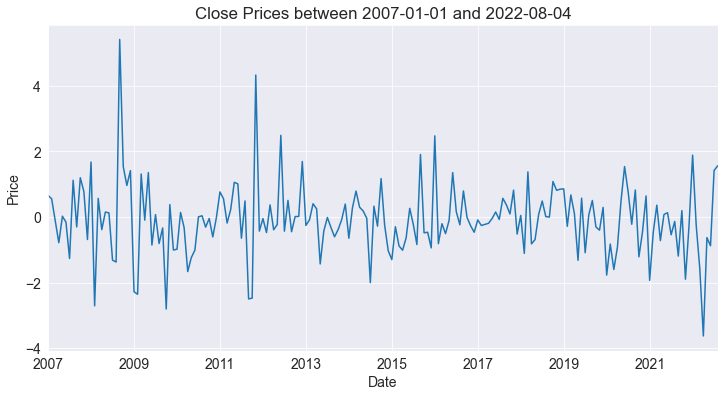

In [9]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
price.plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [10]:
mod = AutoReg(price, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  188
Model:                     AutoReg(3)   Log Likelihood                -279.777
Method:               Conditional MLE   S.D. of innovations              1.098
Date:                Fri, 05 Aug 2022   AIC                            569.554
Time:                        22:31:22   BIC                            585.656
Sample:                    04-30-2007   HQIC                           576.080
                         - 08-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1022      0.082     -1.249      0.212      -0.263       0.058
Returns.L1    -0.0257      0.074     -0.347      0.729      -0.171       0.119
Returns.L2    -0.0235      0.074     -0.317      0.7

In [11]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  188
Model:                     AutoReg(3)   Log Likelihood                -279.777
Method:               Conditional MLE   S.D. of innovations              1.098
Date:                Fri, 05 Aug 2022   AIC                            569.554
Time:                        22:31:22   BIC                            585.656
Sample:                    04-30-2007   HQIC                           576.080
                         - 08-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1022      0.078     -1.305      0.192      -0.256       0.051
Returns.L1    -0.0257      0.097     -0.264      0.791      -0.216       0.164
Returns.L2    -0.0235      0.085     -0.277      0.7

In [12]:
sel = ar_select_order(price, 20, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  188
Model:                     AutoReg(0)   Log Likelihood                -283.416
Method:               Conditional MLE   S.D. of innovations              1.093
Date:                Fri, 05 Aug 2022   AIC                            570.832
Time:                        22:31:22   BIC                            577.305
Sample:                    01-31-2007   HQIC                           573.454
                         - 08-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0864      0.080     -1.085      0.278      -0.243       0.070


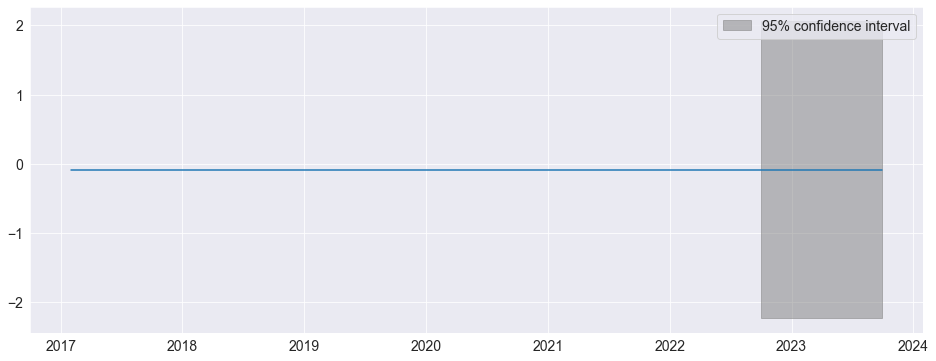

In [13]:
fig = res.plot_predict(120, 200)

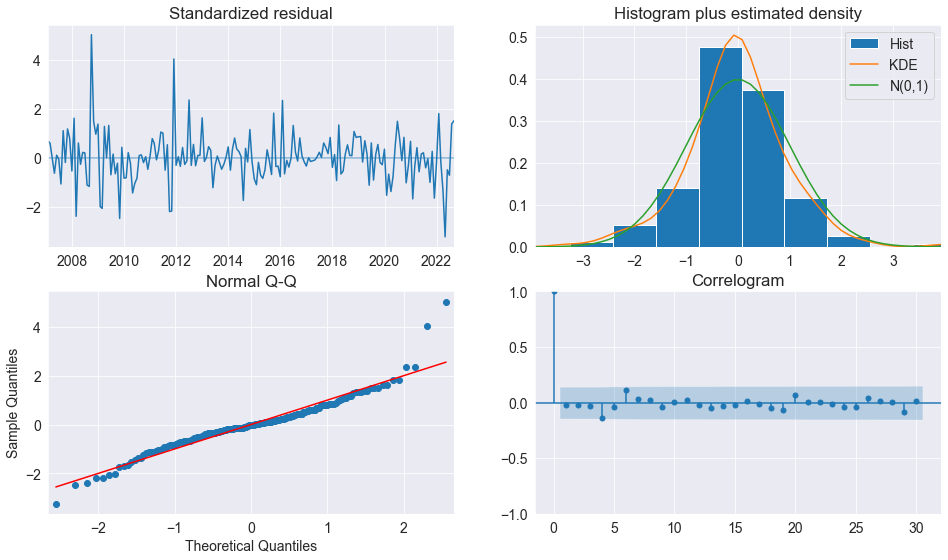

In [14]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [15]:
sel = ar_select_order(price, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  188
Model:               Seas. AutoReg(0)   Log Likelihood                -276.877
Method:               Conditional MLE   S.D. of innovations              1.055
Date:                Fri, 05 Aug 2022   AIC                            579.754
Time:                        22:31:23   BIC                            621.828
Sample:                    01-31-2007   HQIC                           596.801
                         - 08-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0578      0.264     -0.219      0.827      -0.575       0.459
s(2,12)       -0.4669      0.373     -1.252      0.211      -1.198       0.264
s(3,12)        0.1052      0.373      0.282      0.7

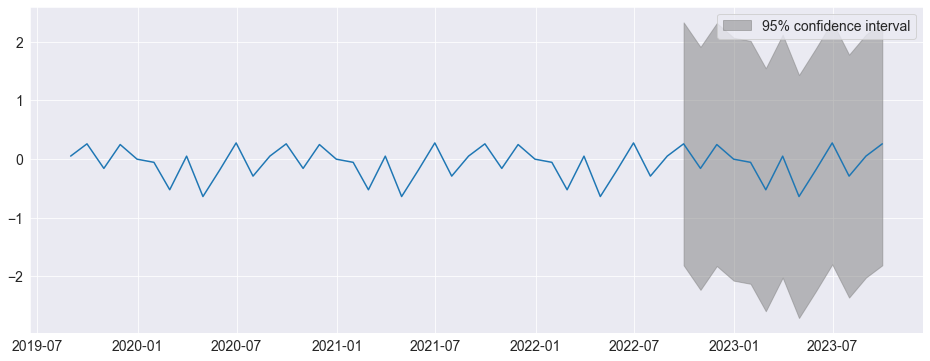

In [16]:
fig = res.plot_predict(151, 200)

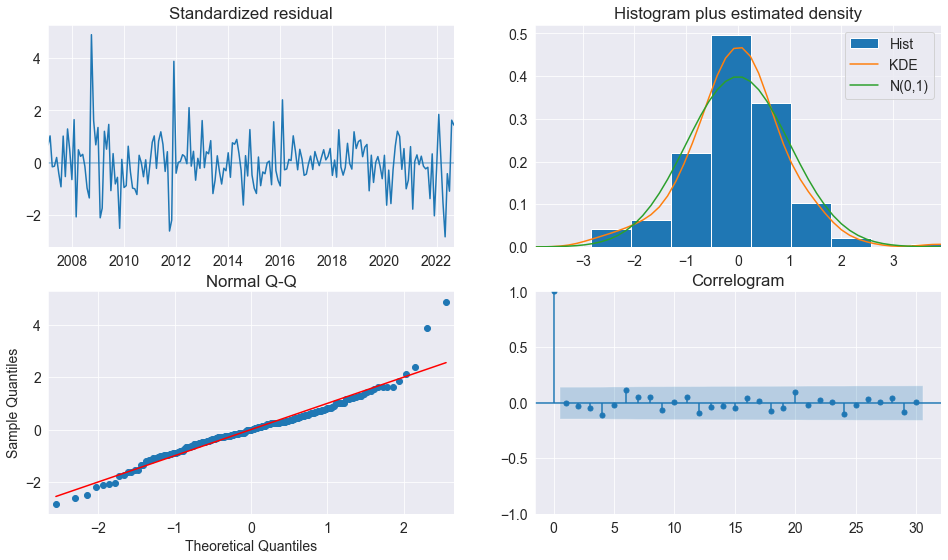

In [17]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)